In [1]:
import numpy as np
import matplotlib.pyplot as plt

Brownian Motion Simulation 

Text(0, 0.5, 'W(t)')

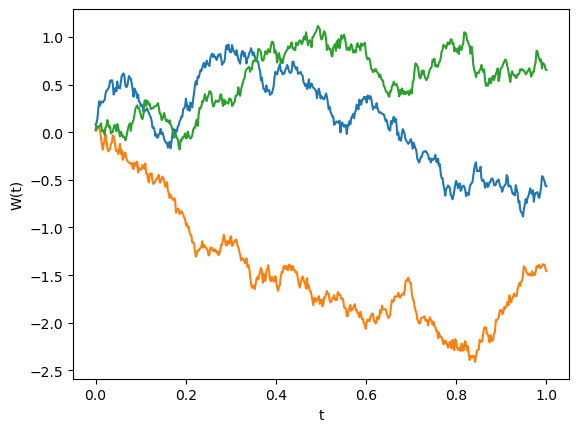

In [2]:
np.random.seed(0) # random seed set so that results are replicable
T = 1
N = 500
dt = T/N
time = np.linspace(0,T,N)

dW = np.zeros(N)
W = np.zeros(N)

for i in range(3):
    dW[0] = np.sqrt(dt)*np.random.standard_normal()
    W[0] = dW[0]
    for j in range(N)[1:]:
        dW[j] = np.sqrt(dt)*np.random.standard_normal()
        W[j] = W[j-1] + dW[j]
    plt.plot(time, W)
    
plt.xlabel('t')
plt.ylabel('W(t)')

IGBM Euler-Maruyama Simulation

Text(0.5, 1.0, 'IGBM')

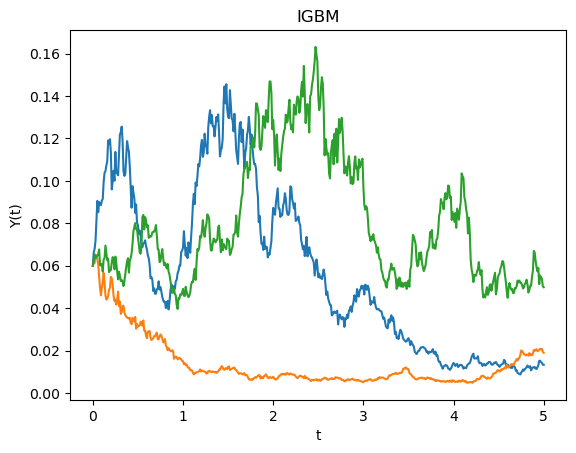

In [3]:
np.random.seed(0) # random seed set so that results are replicable
T = 5 # Final time
N = 500
dt = T/N # Step size
time = np.linspace(0,T,N+1)

# Our parameters
a = 0.1
b = 0.04
sigma = 0.6
Y = np.zeros(N+1) # Our (numerical) solution
Y[0]= 0.06 

for j in range(3): # 3 simulations
    # Brownian Motion increments
    dW = np.sqrt(dt)*np.random.standard_normal(size=N)

    # Euler-Maruyama method
    for i in range(N):
        Y[i+1] = Y[i] + a*(b-Y[i])*dt + sigma*Y[i]*dW[i]
    plt.plot(time,Y)

plt.xlabel('t')
plt.ylabel('Y(t)')
plt.title('IGBM')

IGBM Milstein Simulation

Text(0.5, 1.0, 'IGBM')

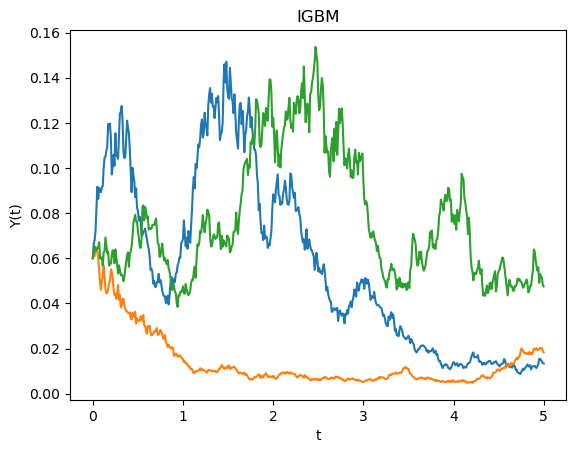

In [4]:
np.random.seed(0) # random seed set so that results are replicable
T = 5 # Final time
N = 500
dt = T/N # Step size
time = np.linspace(0,T,N+1)

# Our parameters
a = 0.1
b = 0.04
sigma = 0.6
Y = np.zeros(N+1) # Our (numerical) solution
Y[0]= 0.06 

for j in range(3): # 3 simulations
    # Brownian Motion increments
    dW = np.sqrt(dt)*np.random.standard_normal(size=N)

    # Euler-Maruyama method
    for i in range(N):
        Y[i+1] = Y[i] + a*(b-Y[i])*dt + sigma*Y[i]*dW[i] + 0.5*(sigma**2)*Y[i]*(dW[i]**2-dt)
    plt.plot(time,Y)

plt.xlabel('t')
plt.ylabel('Y(t)')
plt.title('IGBM')

IGBM Euler-Maruyama Strong convergence rate estimate

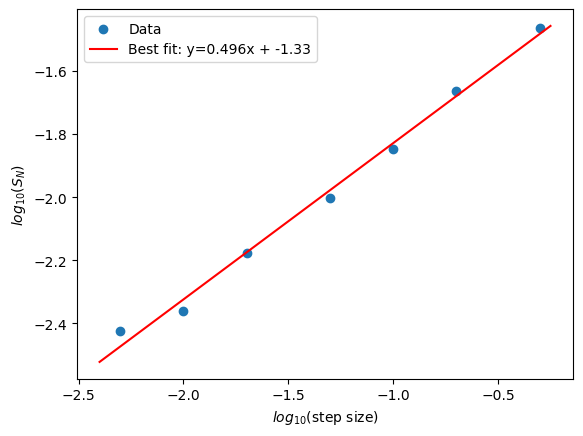

In [6]:
np.random.seed(0) # random seed set so that results are replicable

m = 2000 # Number of samples in Monte-Carlo estimate
T = 5 # Final time

# Our parameters
a = 0.1
b = 0.04
sigma = 0.6

step_sizes = []
strong_errs = []
for N in [10, 25, 50, 100, 250, 500, 1000]:
    dt = T/N # Step size
    step_sizes.append(dt)
    dt_fine = T/(10*N) # Fine step size
    
    Y = np.zeros(N+1) # Numerical solution
    Y_fine = np.zeros(10*N+1) # Fine numerical solution
    Y[0]= 0.06
    Y_fine[0] = 0.06

    strong_sum = 0 # Monte-Carlo sum before averaging
    for j in range(m):
        #Brownian Motion increments
        dW_fine = np.sqrt(dt_fine)*np.random.standard_normal(size=10*N)
        dW = dW_fine.reshape(-1,10).sum(axis=1) # summing in groups of 10

        for i in range(10*N):
            Y_fine[i+1] = Y_fine[i] + a*(b-Y_fine[i])*dt_fine + sigma*Y_fine[i]*dW_fine[i]

        for i in range(N):
            Y[i+1] = Y[i] + a*(b-Y[i])*dt + sigma*Y[i]*dW[i]

        strong_sum += (Y[-1]-Y_fine[-1])**2
    strong_est = np.sqrt(strong_sum / m)
    strong_errs.append(strong_est)

log_step = np.log10(step_sizes)
log_err = np.log10(strong_errs)

slope, intercept = np.polyfit(log_step, log_err, 1)

plt.scatter(log_step, log_err)
plt.xlabel(r'$log_{10}(\text{step size})$')
plt.ylabel(r'$log_{10}(S_N)$')
plt.legend('Data')

mesh = np.linspace(-2.4, -0.25, 2)
plt.plot(mesh, slope*mesh+intercept, c='red')
plt.legend(['Data', f'Best fit: y={slope:.3g}x + {intercept:.3g}'])

IGBM Milstein Strong convergence rate estimate

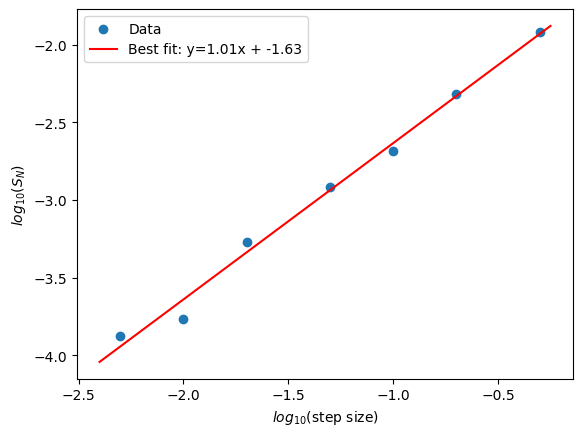

In [7]:
np.random.seed(0) # random seed set so that results are replicable

m = 2000 # Number of samples in Monte-Carlo estimate
T = 5 # Final time

# Our parameters
a = 0.1
b = 0.04
sigma = 0.6

step_sizes = []
strong_errs = []
for N in [10, 25, 50, 100, 250, 500, 1000]:
    dt = T/N # Step size
    step_sizes.append(dt)
    dt_fine = T/(10*N) # Fine step size
    
    Y = np.zeros(N+1) # Numerical solution
    Y_fine = np.zeros(10*N+1) # Fine numerical solution
    Y[0]= 0.06
    Y_fine[0] = 0.06

    strong_sum = 0 # Monte-Carlo sum before averaging
    for j in range(m):
        #Brownian Motion increments
        dW_fine = np.sqrt(dt_fine)*np.random.standard_normal(size=10*N)
        dW = dW_fine.reshape(-1,10).sum(axis=1) # summing in groups of 10

        for i in range(10*N):
            Y_fine[i+1] = Y_fine[i] + a*(b-Y_fine[i])*dt_fine + sigma*Y_fine[i]*dW_fine[i] \
                                    + 0.5*(sigma**2)*Y_fine[i]*(dW_fine[i]**2-dt_fine)

        for i in range(N):
            Y[i+1] = Y[i] + a*(b-Y[i])*dt + sigma*Y[i]*dW[i] + 0.5*(sigma**2)*Y[i]*(dW[i]**2-dt)

        strong_sum += (Y[-1]-Y_fine[-1])**2
    strong_est = np.sqrt(strong_sum / m)
    strong_errs.append(strong_est)

log_step = np.log10(step_sizes)
log_err = np.log10(strong_errs)

slope, intercept = np.polyfit(log_step, log_err, 1)

plt.scatter(log_step, log_err)
plt.xlabel(r'$log_{10}(\text{step size})$')
plt.ylabel(r'$log_{10}(S_N)$')
plt.legend('Data')

mesh = np.linspace(-2.4, -0.25, 2)
plt.plot(mesh, slope*mesh+intercept, c='red')
plt.legend(['Data', f'Best fit: y={slope:.3g}x + {intercept:.3g}'])